In [51]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Import files 

In [1]:
import implementations, function, helpers

from implementations import *
from function import *
from helpers import *

## Load the data


In [2]:
import pandas as pd

pd.set_option('display.max_columns', None)
df = pd.read_csv('train.csv')

df.head(30)

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.200,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497
1,100001,b,160.937,68.768,103.235,48.146,-999.000,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.000,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.000,-999.000,46.226
2,100002,b,-999.000,162.172,125.953,35.635,-999.000,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.000,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.000,-999.000,44.251
3,100003,b,143.905,81.417,80.943,0.414,-999.000,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.000,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,100004,b,175.864,16.915,134.805,16.405,-999.000,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.000,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
5,100005,b,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,278.876,0.588,0.479,0.975,53.651,0.371,1.329,31.565,-0.884,1.857,40.735,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660
6,100006,s,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,305.967,3.371,1.393,0.791,28.850,1.113,2.409,97.240,0.675,-0.966,38.421,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877
7,100007,s,154.916,10.418,94.714,29.169,-999.000,-999.000,-999.000,2.897,1.526,138.178,0.365,-1.305,-999.000,78.800,0.654,1.547,28.740,0.506,-1.347,22.275,-1.761,187.299,1,30.638,-0.715,-1.724,-999.000,-999.000,-999.000,30.638
8,100008,b,105.594,50.559,100.989,4.288,-999.000,-999.000,-999.000,2.904,4.288,65.333,0.675,-1.366,-999.000,39.008,2.433,-2.532,26.325,0.210,1.884,37.791,0.024,129.804,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
9,100009,s,128.053,88.941,69.272,193.392,-999.000,-999.000,-999.000,1.609,28.859,255.123,0.599,0.538,-999.000,54.646,-1.533,0.416,32.742,-0.317,-0.636,132.678,0.845,294.741,1,167.735,-2.767,-2.514,-999.000,-999.000,-999.000,167.735


In [53]:
df.shape

(250000, 32)

-999.000 means missing value.

Prediction and PRI_jet_num are categorical values (22th column).

Others are continuous.

In [4]:
data_path_tr = "train.csv"
data_path_te = "test.csv"
data_path_sub = "sample-submission.csv"

# load data.
y_tr, x_tr, ids_tr = load_csv_data(data_path_tr, sub_sample=False)
y_te, x_te, ids_te = load_csv_data(data_path_te, sub_sample=False)
#y_su, x_su, ids_su = load_csv_data(data_path_sub, sub_sample=False)

In [5]:
print(x_tr.shape)
print(y_tr.shape)


(250000, 30)
(250000,)


In [562]:
x_tr[:,3].size

250000

## Plot data

C:\Users\User\AppData\Local\Temp\ipykernel_7076\1019377042.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,5))


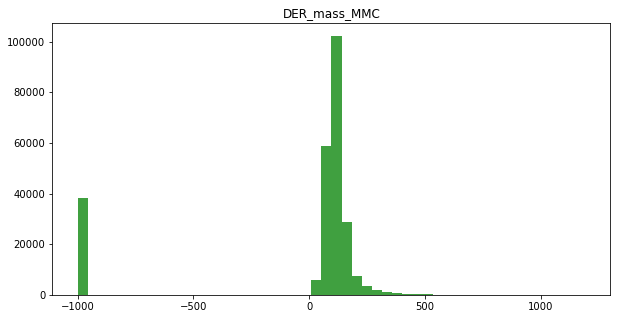

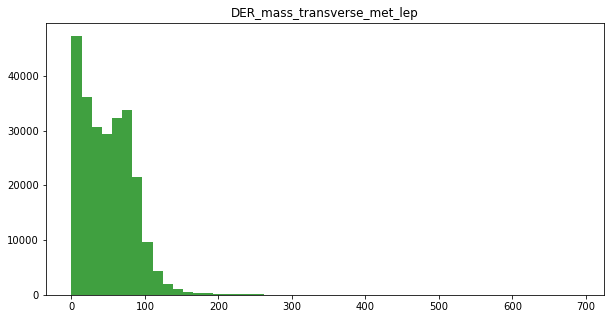

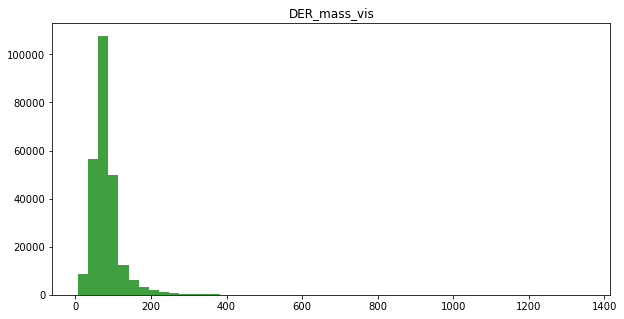

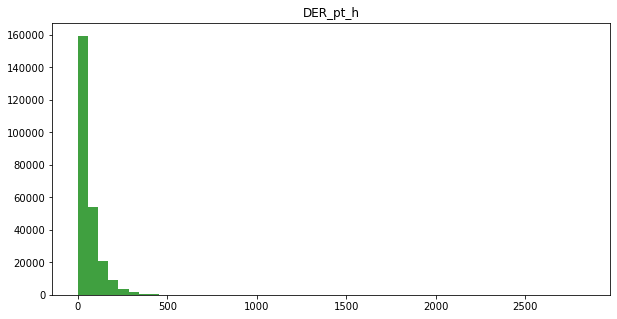

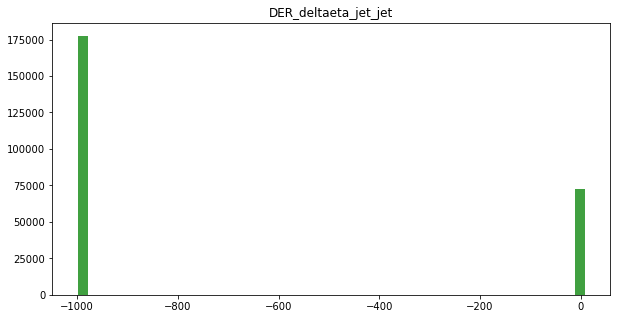

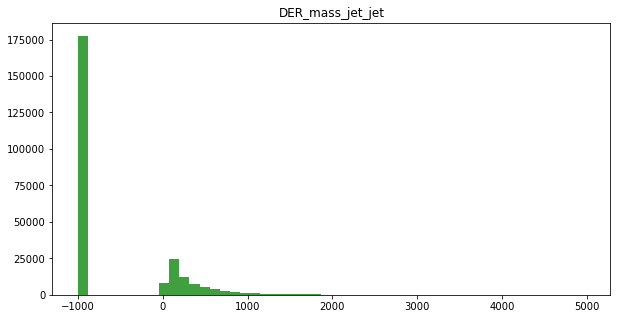

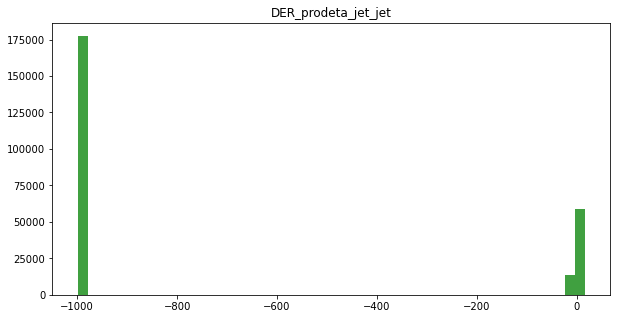

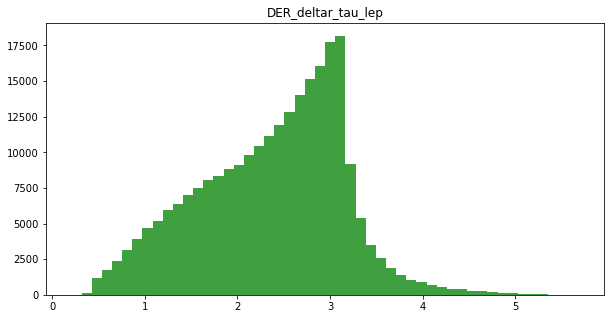

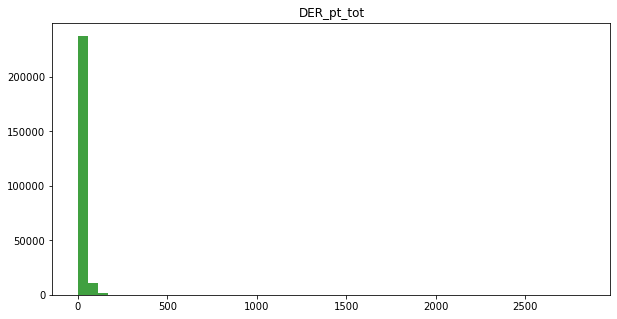

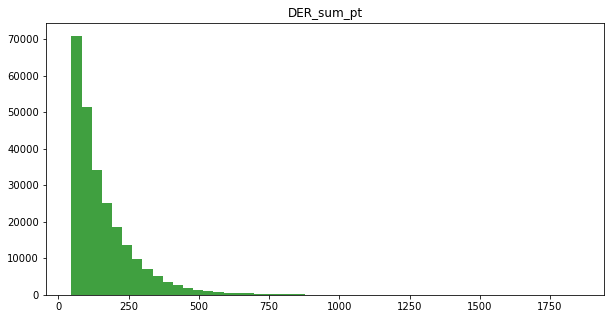

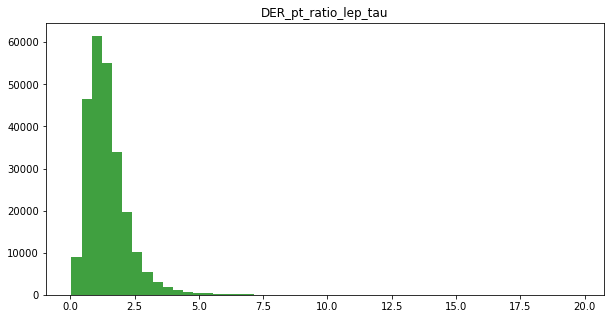

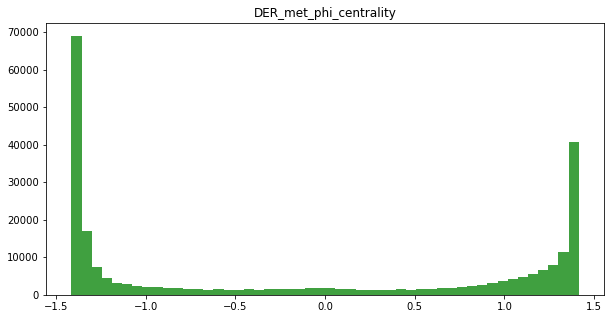

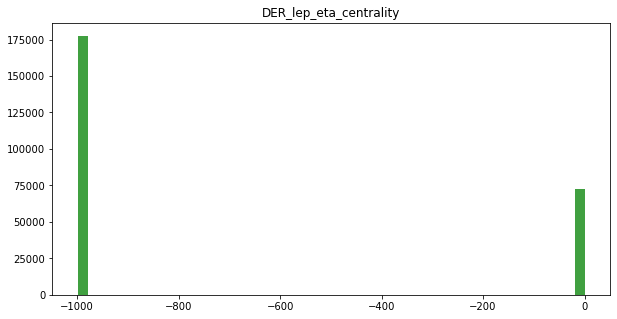

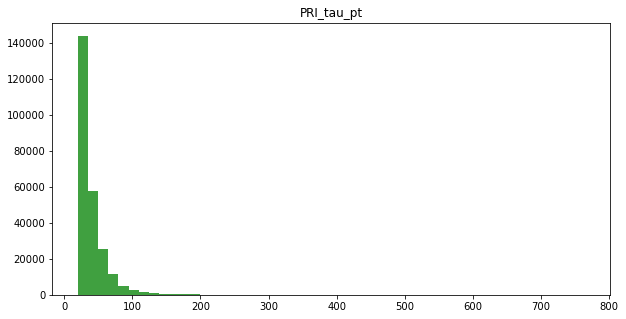

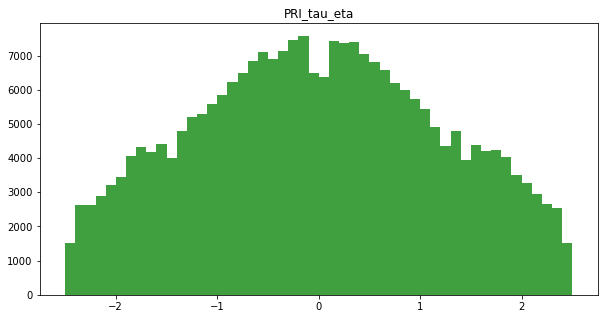

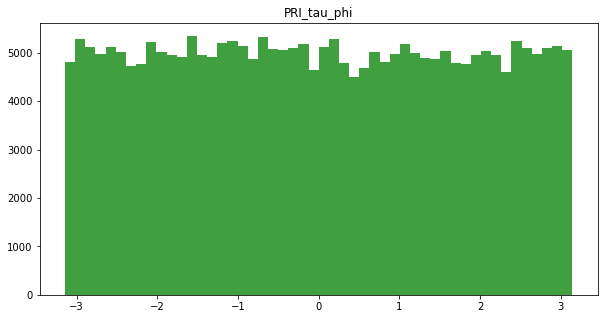

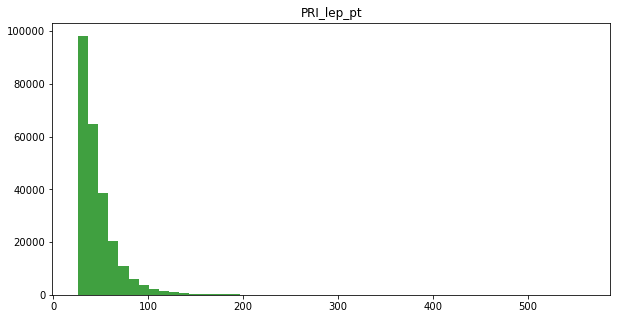

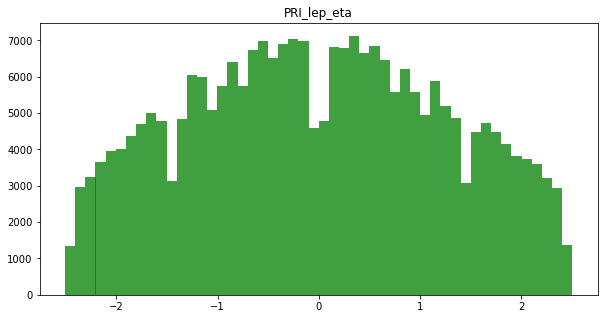

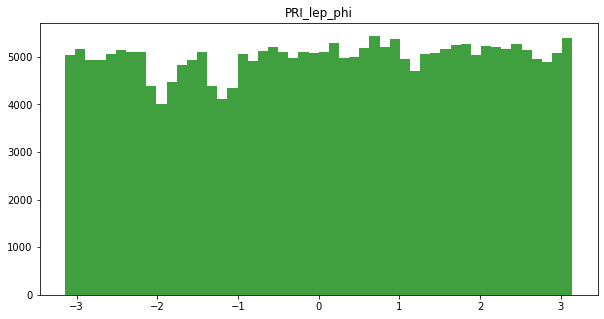

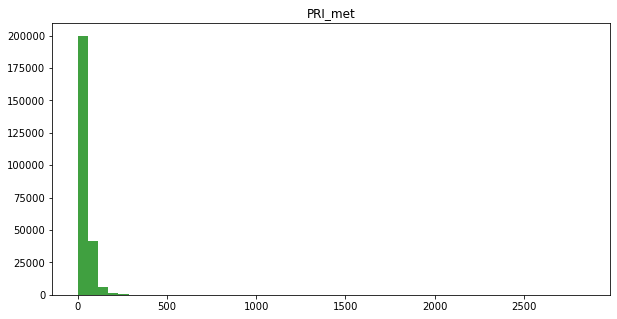

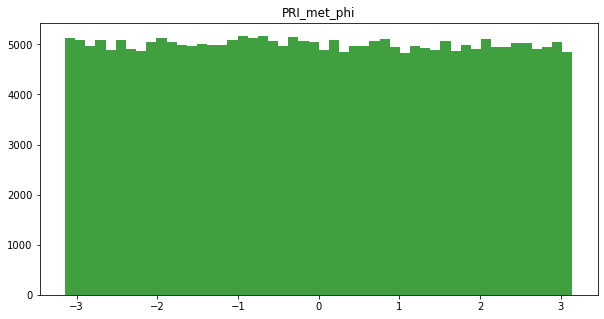

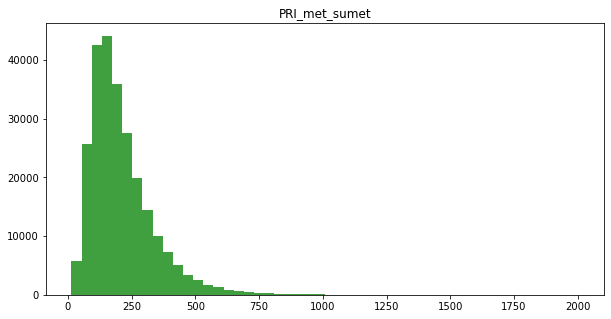

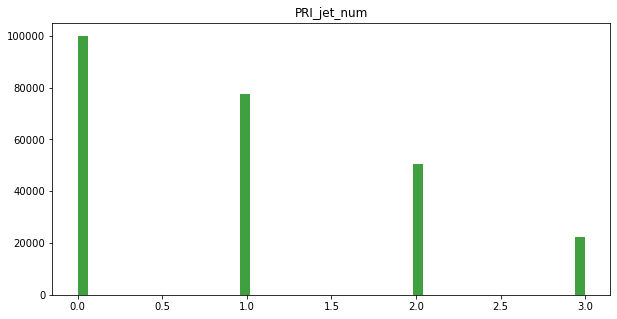

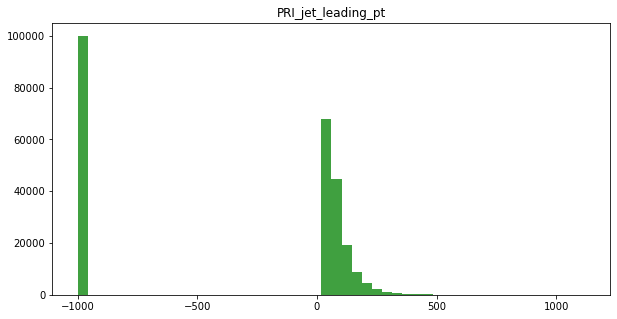

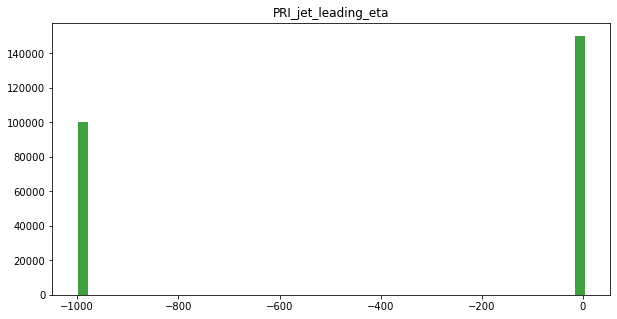

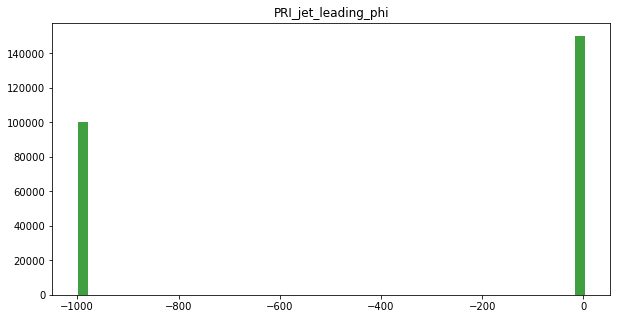

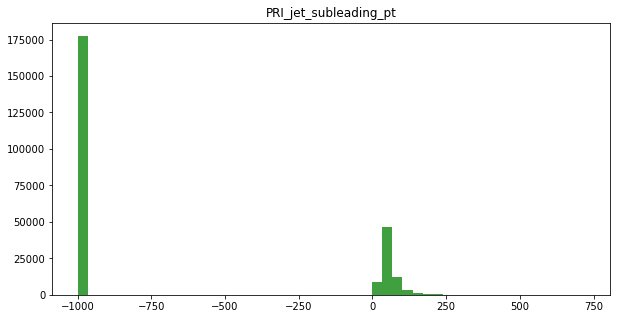

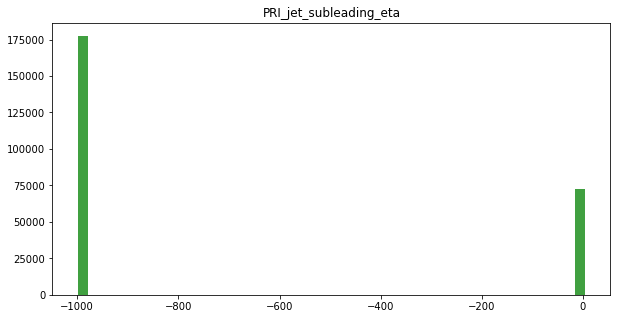

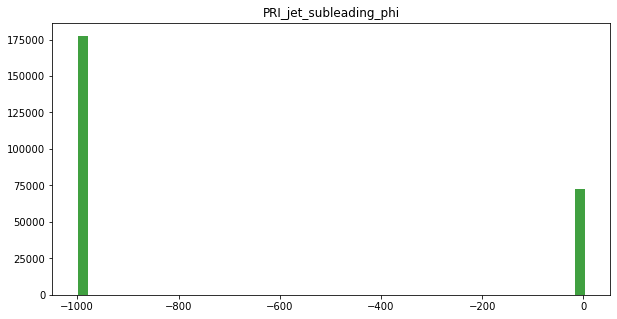

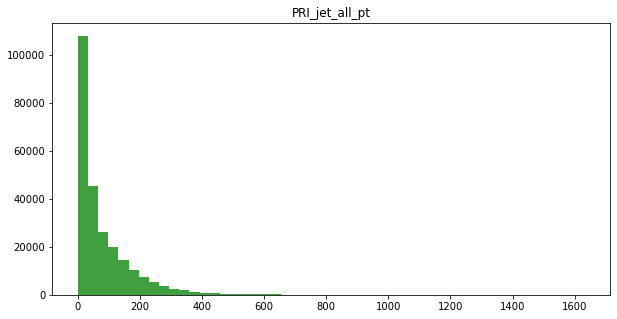

In [7]:
names = ["DER_mass_MMC", "DER_mass_transverse_met_lep", "DER_mass_vis", "DER_pt_h", "DER_deltaeta_jet_jet", "DER_mass_jet_jet", "DER_prodeta_jet_jet", "DER_deltar_tau_lep", "DER_pt_tot", "DER_sum_pt", "DER_pt_ratio_lep_tau", "DER_met_phi_centrality", "DER_lep_eta_centrality", "PRI_tau_pt", "PRI_tau_eta", "PRI_tau_phi", "PRI_lep_pt", "PRI_lep_eta", "PRI_lep_phi", "PRI_met", "PRI_met_phi", "PRI_met_sumet", "PRI_jet_num", "PRI_jet_leading_pt", "PRI_jet_leading_eta", "PRI_jet_leading_phi", "PRI_jet_subleading_pt", "PRI_jet_subleading_eta", "PRI_jet_subleading_phi", "PRI_jet_all_pt"]

#fig, axs = plt.subplots(15, 2, figsize=(50,50))

for i in range(len(names)):
    plt.figure(figsize=(10,5))
    plt.hist(x_tr[:,i], 50, density=False, facecolor='g', alpha=0.75, label=names[i])
    plt.title(names[i])

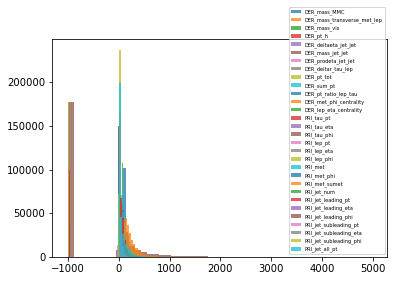

In [8]:
for i in range(len(names)):
    plt.hist(x_tr[:,i], 50, alpha=0.75, label = names[i])
    plt.legend(fontsize=5)

We can observe a very big proportion of missing data (around 175'000).  

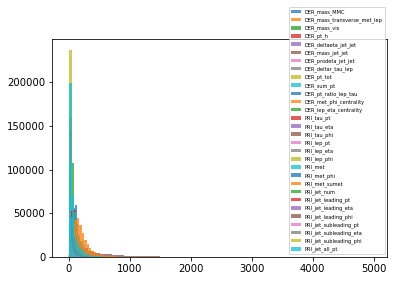

In [9]:
#clean outliers 
x_tr_nan = put_nan(x_tr)
x_te_nan = put_nan(x_te)

for i in range(len(names)):
    plt.hist(x_tr_nan[:,i], 50, alpha=0.75, label = names[i])
    plt.legend(fontsize=5)


In [10]:
temp = pd.DataFrame(x_tr_nan, columns = ["DER_mass_MMC", "DER_mass_transverse_met_lep", "DER_mass_vis", "DER_pt_h", "DER_deltaeta_jet_jet", "DER_mass_jet_jet", "DER_prodeta_jet_jet", "DER_deltar_tau_lep", "DER_pt_tot", "DER_sum_pt", "DER_pt_ratio_lep_tau", "DER_met_phi_centrality", "DER_lep_eta_centrality", "PRI_tau_pt", "PRI_tau_eta", "PRI_tau_phi", "PRI_lep_pt", "PRI_lep_eta", "PRI_lep_phi", "PRI_met", "PRI_met_phi", "PRI_met_sumet", "PRI_jet_num", "PRI_jet_leading_pt", "PRI_jet_leading_eta", "PRI_jet_leading_phi", "PRI_jet_subleading_pt", "PRI_jet_subleading_eta", "PRI_jet_subleading_phi", "PRI_jet_all_pt"])


In [66]:
temp.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,211886.000000,250000.000000,250000.000000,250000.000000,72543.000000,72543.000000,72543.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,72543.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,150087.000000,150087.000000,150087.000000,72543.000000,72543.000000,72543.000000,250000.000000
mean,121.858528,49.239819,81.181982,57.895962,2.403735,371.783360,-0.821688,2.373100,18.917332,158.432217,1.437609,-0.128305,0.458290,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,84.822105,-0.003275,-0.012393,57.679474,-0.011845,-0.001582,73.064591
std,57.298157,35.344886,40.828691,63.655682,1.742226,397.699325,3.584362,0.782911,22.273494,115.706115,0.844743,1.193585,0.398681,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,60.662276,1.784546,1.813385,31.985782,2.031743,1.816950,98.015662
min,9.044000,0.000000,6.329000,0.000000,0.000000,13.602000,-18.066000,0.208000,0.000000,46.104000,0.047000,-1.414000,0.000000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,30.000000,-4.499000,-3.142000,30.000000,-4.500000,-3.142000,0.000000
25%,91.885250,19.241000,59.388750,14.068750,0.882500,111.977000,-2.629000,1.810000,2.841000,77.550000,0.883000,-1.371000,0.004000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,44.422500,-1.342000,-1.584000,37.312000,-1.612000,-1.576500,0.000000
50%,112.406000,46.524000,73.752000,38.467500,2.107000,225.885000,-0.244000,2.491500,12.315500,120.664500,1.280000,-0.356000,0.454000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,65.561000,0.000000,-0.033000,47.902000,-0.010000,-0.002000,40.512500
75%,135.482000,73.598000,92.259000,79.169000,3.690000,478.226000,0.958000,2.961000,27.591000,200.478250,1.777000,1.225000,0.879000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,103.342000,1.336000,1.562000,66.637000,1.589500,1.576000,109.933750
max,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,19.773000,1.414000,1.000000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000


C:\Users\User\AppData\Local\Temp\ipykernel_12180\3730796060.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,5))


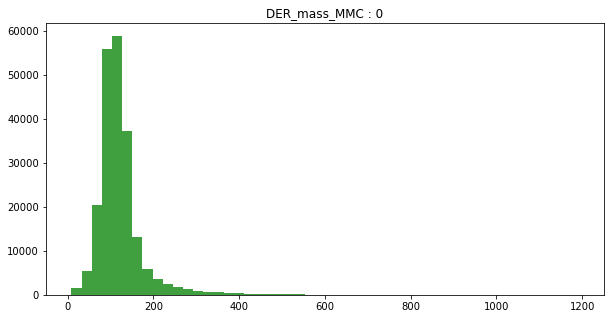

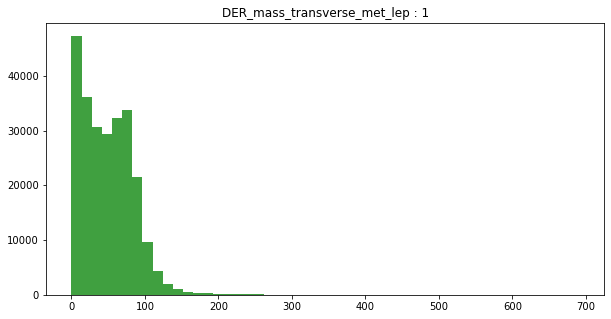

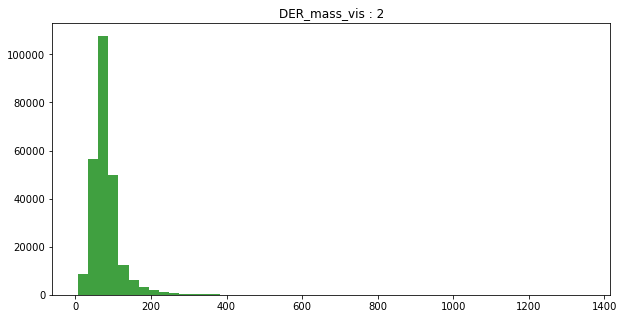

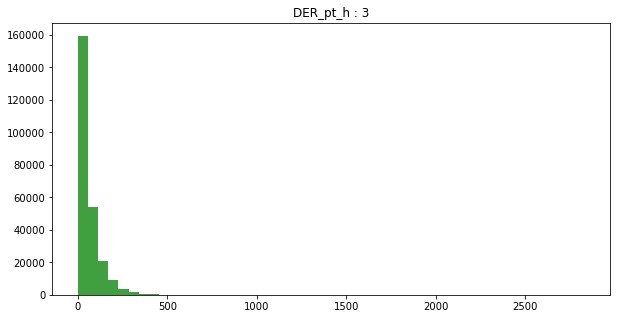

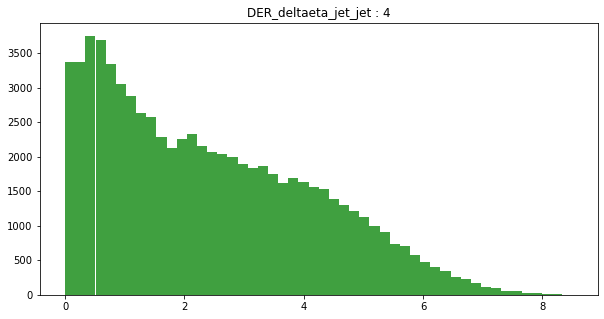

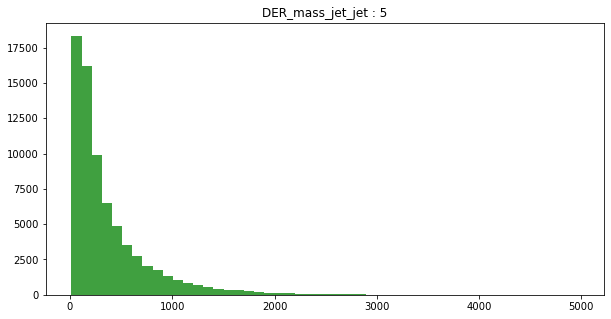

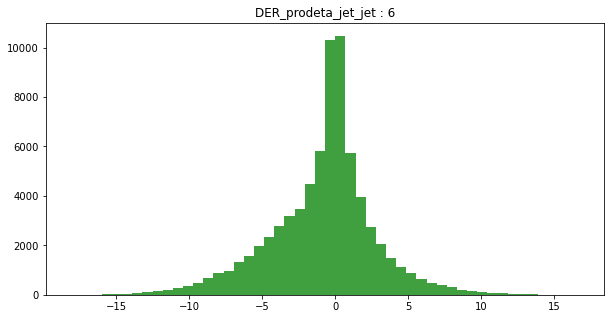

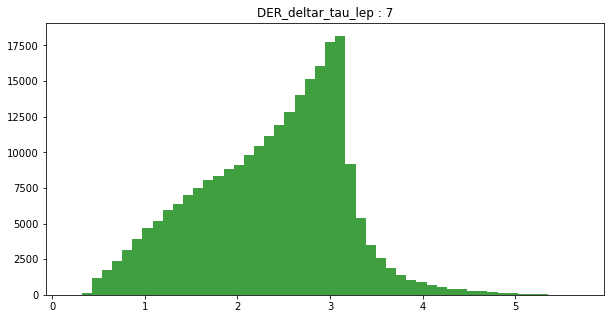

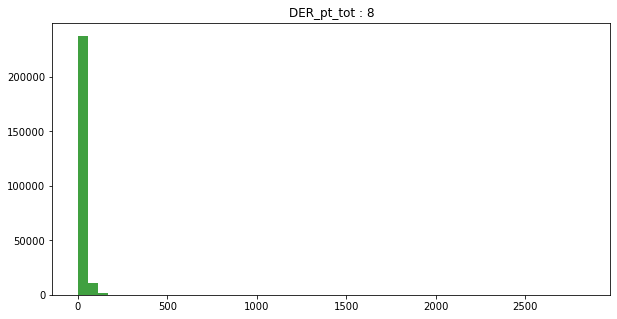

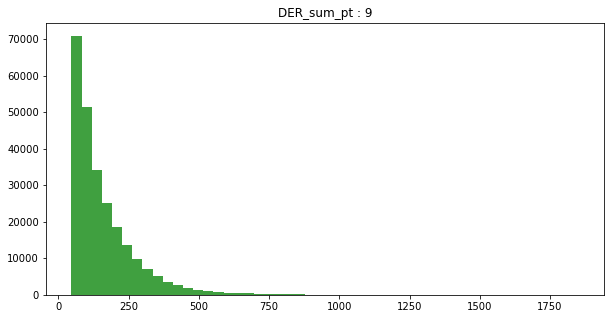

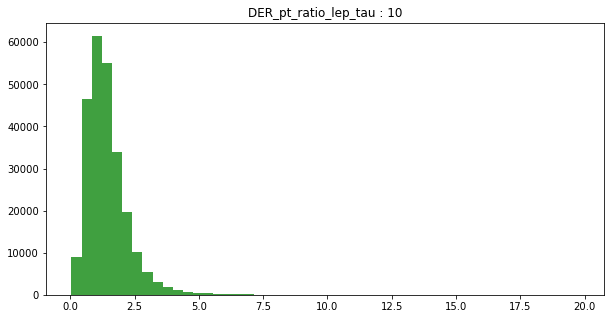

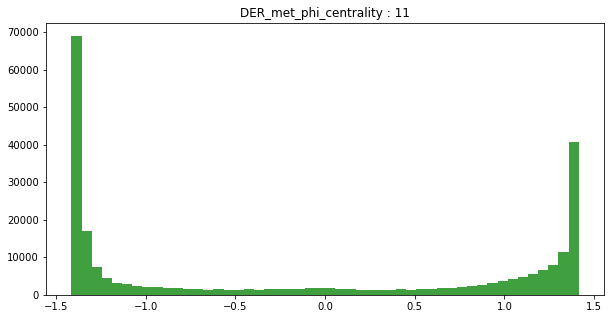

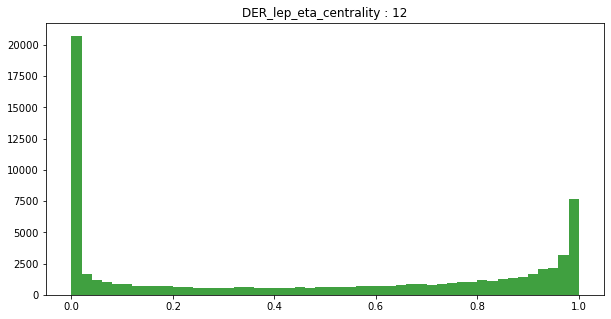

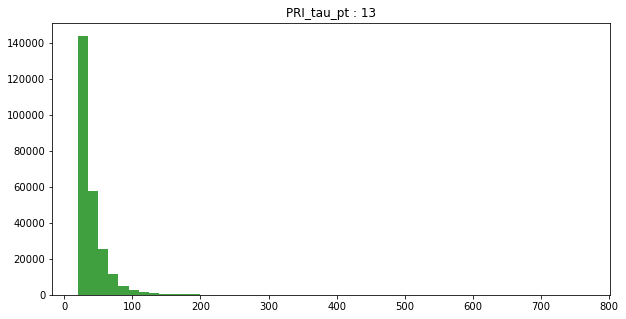

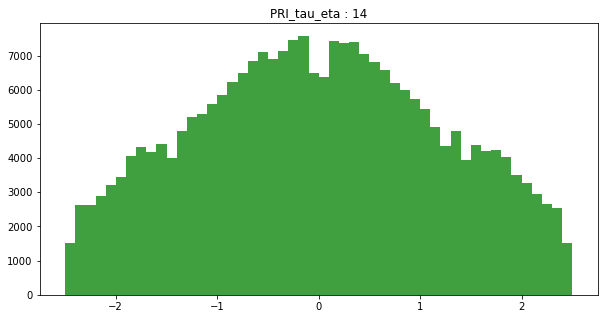

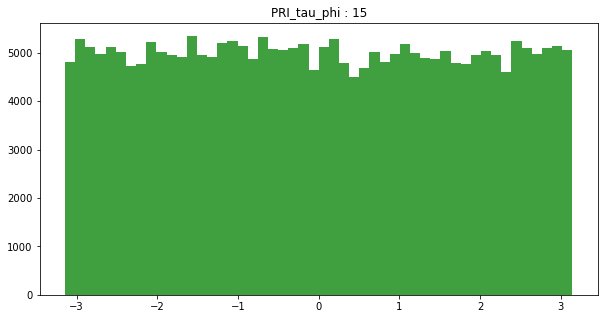

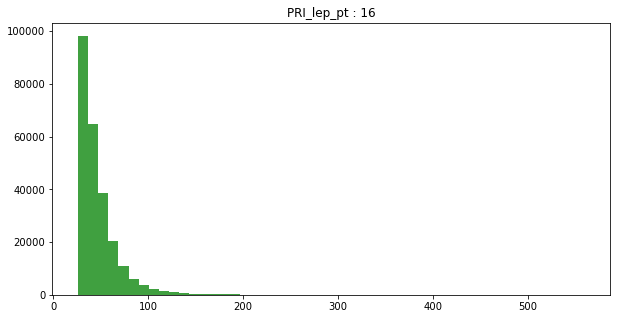

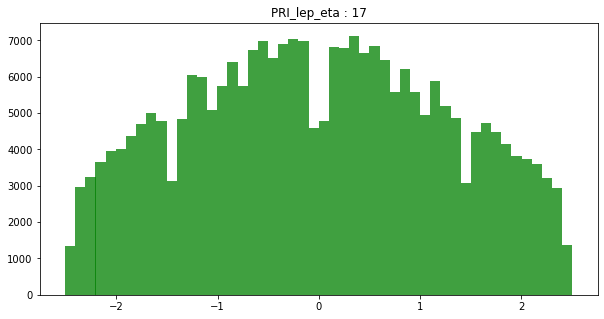

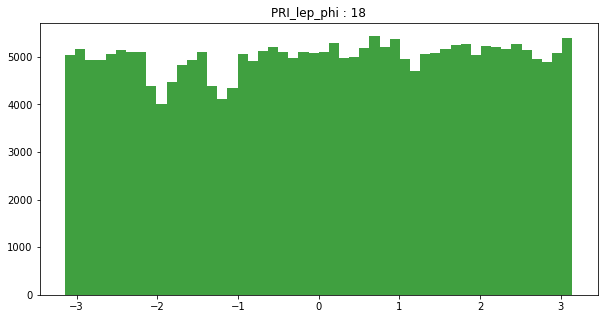

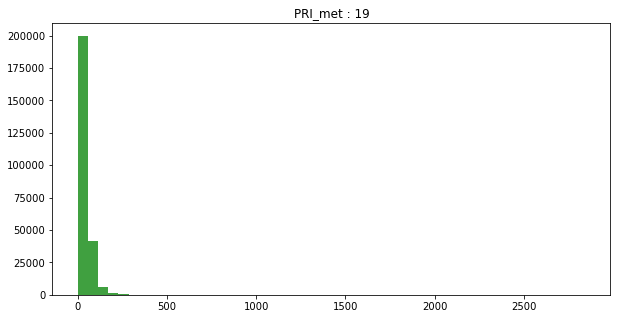

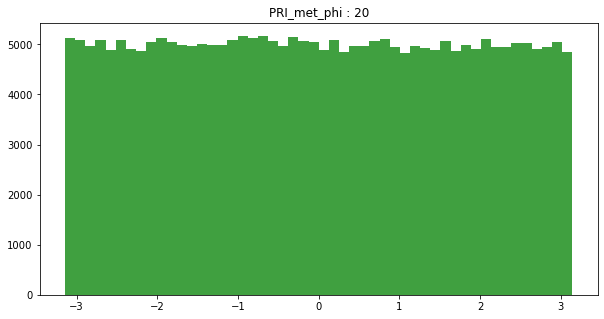

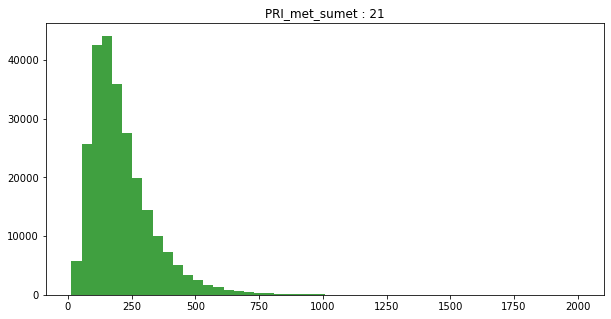

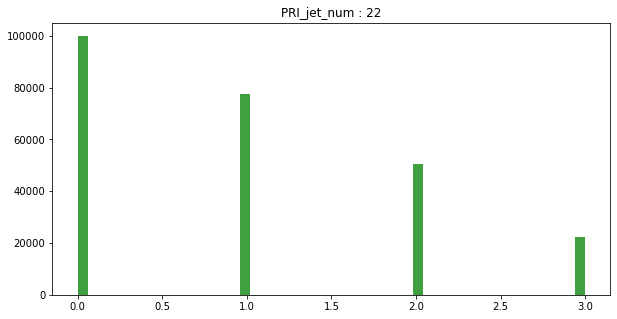

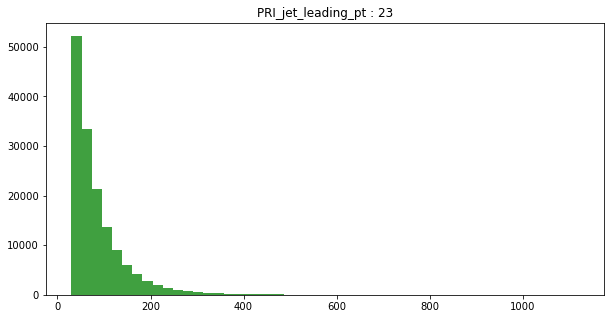

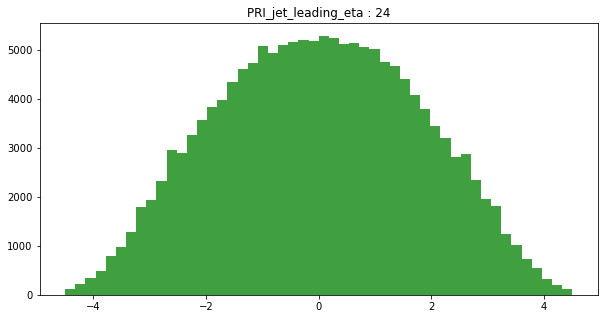

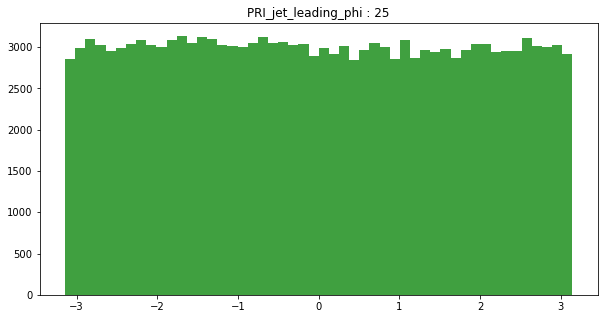

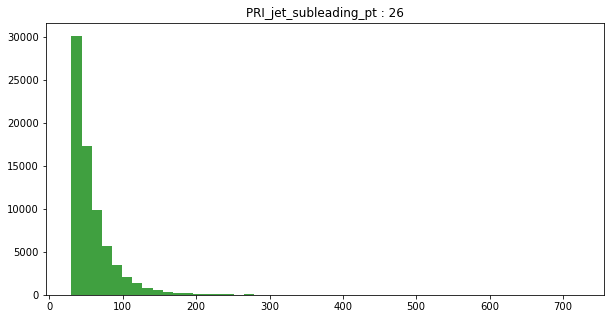

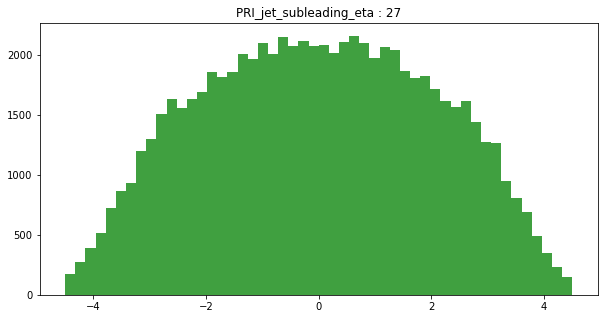

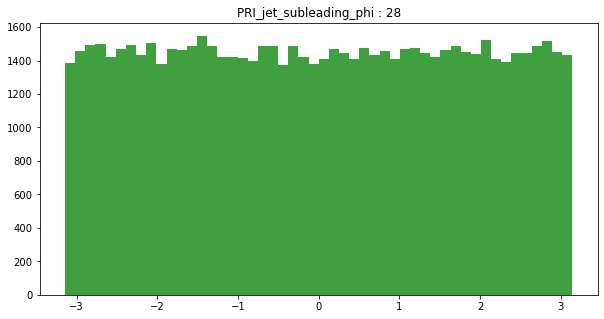

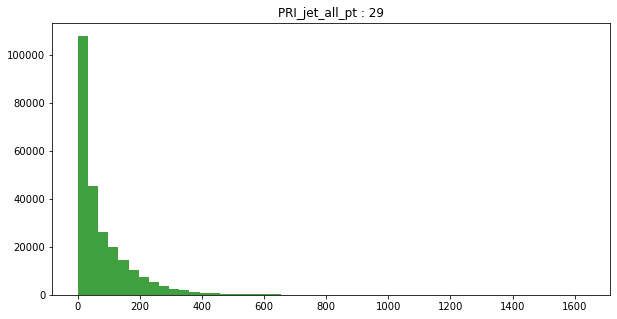

In [67]:
for i in range(len(names)):
    plt.figure(figsize=(10,5))
    plt.hist(x_tr_nan[:,i], 50, density=False, facecolor='g', alpha=0.75, label=names[i])
    plt.title(names[i] + " : " + str(i))

# Standardize data

We need to replace the missing data with smart values

1. Separate class and reg data 

In [11]:
x_tr_class = x_tr[:, 22]
x_tr_reg = np.delete(x_tr, 22, axis=1)

x_te_class = x_te[:, 22]
x_te_reg = np.delete(x_te, 22, axis=1)

2. replace outliers by median 

In [12]:
# Not standardize but value of nan replace 
x_tr_reg = replace_nan_by_median(x_tr_reg)
x_te_reg = replace_nan_by_median(x_te_reg)

In [13]:
y_tr=y_tr.reshape(-1,1)
y_te=y_te.reshape(-1,1)

In [52]:
print(x_tr_reg.shape)
print(x_te_reg.shape)

(250000, 29)
(568238, 29)


# Find right lambda

In [ ]:
#Ridge Regression

In [79]:
from sklearn.preprocessing import PolynomialFeatures

def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree """
    poly = np.ones((len(x),1))
    for deg in range(1 ,degree+1 ) : 
        poly = np.c_[poly, np.power(x, deg)]
    #poly = PolynomialFeatures(degree)
    #poly=poly.fit_transform(x)

    return poly  

In [58]:
test=np.array([[0, 1],
       [2, 3],
       [4, 5]])

In [64]:
build_poly(test,2)#sklearn

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [81]:
build_poly(test,2)#build_poly

array([[ 1,  0,  0,  1,  1,  1],
       [ 1,  2,  4,  1,  3,  9],
       [ 1,  4, 16,  1,  5, 25]])

In [18]:
def build_k_indices(y, k_fold):
    """build k indices for k-fold.
    """
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval] for k in range(k_fold)]
    #print(k_indices)
    return np.array(k_indices)

In [19]:
def cross_validation(y, x, k_indices, k, lambda_, degree,model):
    """return the loss of ridge regression for a fold corresponding to k_indices
    """
    # get k'th subgroup in test, others in train
    
    ind_te = k_indices[k]
    ind_tr = k_indices[~(np.arange(k_indices.shape[0]) == k)]
    ind_tr = ind_tr.reshape(-1)

    x_te  = x[ind_te]
    x_tr = x[ind_tr]
    y_te  = y[ind_te]
    y_tr = y[ind_tr]
    
  

    # form data with polynomial degree
    x_tr_poly =  build_poly(x_tr , degree)    
    x_te_poly =  build_poly(x_te , degree) 
    

    if model == 'ridge_regression':
        w , loss_tr =  ridge_regression(y_tr, x_tr_poly , lambda_)
    elif model == 'least_squares':
        w , loss_tr = least_squares(y_tr, x_tr_poly)
    
    loss_te = compute_loss(y_te,x_te_poly,w,'mse')
    #raise NotImplementedError
    return loss_tr, loss_te

In [680]:

def best_degree_lambda_combination_selection(y,x,degrees, k_fold, lambdas):
    """cross validation over regularisation parameter lambda and degree.
    """
    
    # split data in k fold
    k_indices = build_k_indices(y, k_fold)
    # cross validation over degrees and lambdas
    best_lambda=0.0
    best_degree=0.0
    best_mse= 10.
    
    comb_array = np.array(np.meshgrid(degrees,lambdas)).T.reshape(-1, 2)
  
    for combination in comb_array:
        avg_loss_te=0.0 # the loss of the "test" part within the training data when perform cross validation
        avg_loss_tr=0.0
        for k in range(k_fold):
            loss_k_train, loss_k_test = cross_validation(y, x, k_indices, k, combination[1],combination[0],'ridge_regression')
            avg_loss_tr += loss_k_train           
            avg_loss_te += loss_k_test
        avg_loss_te /= k_fold
        avg_loss_tr /= k_fold

        if(avg_loss_te < best_mse):
            best_mse= avg_loss_te
            best_lambda = combination[1]
            best_degree = combination[0]
        
    return best_degree, best_lambda, best_mse


In [530]:
#find the best combination of degree and lambda for ridge regression using 10-fold cross validation

#best_degree_ridge, best_lambda_ridge, best_mse_ridge = best_degree_lambda_combination_selection(y_tr,x_tr_reg,np.arange(2,8), 2, np.logspace(-4, 0, 15))

(250000, 29)



In [556]:
#cross validation for lambda ridge regression

In [ ]:
#we can keep the best degree from least _squares

In [42]:

def cross_validation_lambda(x,y,degree, k_fold, lambdas):
    """cross validation over regularisation parameter lambda.
    """
    # split data in k fold
    k_indices = build_k_indices(y, k_fold)

    
    mse_tr = []
    mse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation over lambdas: 
    
    best_lambda=0
    best_mse= 10.
    for lamba in lambdas:
        
        avg_loss_te=0.0
        avg_loss_tr=0.0
        for k in range(k_fold):
            loss_k_train, loss_k_test = cross_validation(y, x, k_indices, k, lamba, degree,'ridge_regression')
            avg_loss_tr += loss_k_train           
            avg_loss_te += loss_k_test
        avg_loss_te /= k_fold
        avg_loss_tr /= k_fold
        
        if(avg_loss_te < best_mse):
            best_mse= avg_loss_te
            best_lambda = lamba
        mse_tr.append(avg_loss_tr)
        mse_te.append(avg_loss_te)
        
    #raise NotImplementedError    
    return best_lambda, best_mse



In [682]:
best_degree_least

2

In [43]:
best_lambda_ridge, best_mse_ridge = cross_validation_lambda(x_tr_reg, y_tr, best_degree_least, 4, np.logspace(-4, 0, 15))

In [68]:
print(f"Best lambda for ridge reg squares: {best_lambda_ridge} ,with  best_mse in average {best_mse_ridge} ")


Best lambda for ridge reg squares: 0.0001 ,with  best_mse in average [[0.09871988]] 


In [ ]:
#train again with the best parameters in the whole training data and not only in 9/10 part, 
#building polynomial data with the best degree

In [45]:
x_tr_poly_ridge=build_poly(x_tr_reg, best_degree_least)
final_w_ridge, final_loss_ridge = ridge_regression(y_tr, x_tr_poly_ridge , best_lambda_ridge)

In [46]:
print(f"Final ridge regression loss: {final_loss_ridge} ")

Final ridge regression loss: 0.07896254930329653 


In [47]:
#Test to the real testing dataset using the final training weights
x_te_poly_ridge= build_poly(x_te_reg, best_degree_least)
x_te_loss_ridge= compute_loss(y_te,x_te_poly_ridge,final_w_ridge,'mse')


In [48]:
print(f"Test loss using least squares: {x_te_loss_ridge} ")

Test loss using least squares: [[0.24887967]] 


In [49]:
y_output_predicted_ridge = x_te_poly.dot(final_w_least)

In [50]:
y_output_predicted_ridge[y_output_predicted_ridge >= 0] = 1
y_output_predicted_ridge[y_output_predicted_ridge < 0] = -1

In [51]:
#from sklearn import metrics
#print(sklearn.metrics.accuracy_score(y_te, y_output_predicted_ridge))
#print(sklearn.metrics.f1_score(y_te, y_output_predicted_ridge))
#we are doing something wrong 

0.919174712004477
0.9578853933985482


In [ ]:
#Least Squares

In [699]:
def plot_cross_validation_degree(lambdas, loss_tr, loss_te, degrees): 
    
    
    fig, axs = plt.subplots(degrees.shape[0])
    for ind, degre in enumerate(degrees) : 
        axs[ind].semilogx(lambdas, loss_tr[ind], marker=".", color='b', label='train error')
        axs[ind].semilogx(lambdas, loss_te[ind], marker=".", color='r', label='test error')
        axs[ind].set_xlabel("lambda")
        axs[ind].set_ylabel("Loss")
        axs[ind].legend(loc=2)
        axs[ind].grid(True)
    

In [22]:
def cross_validation_over_degree(y,x,degrees, k_fold):
    """cross validation over regularisation parameter degree.
    """
    k_indices = build_k_indices(y, k_fold)
    mse_tr = []
    mse_te = []
    
    lambda_=0
    # INSERT YOUR CODE HERE
    # cross validation over degree
   
    for ind, degree_ in enumerate(degrees):
        
        loss_tr_k = []
        loss_te_k = []
        
        for k in range(k_fold):
            loss_k_train, loss_k_test = cross_validation(y, x, k_indices, k, lambda_, degree_,'least_squares')
            loss_tr_k = np.append(loss_tr_k,loss_k_train)
            loss_te_k = np.append(loss_te_k,loss_k_test)
        mse_tr = np.append(mse_tr, np.mean(loss_tr_k))
        mse_te = np.append(mse_te, np.mean(loss_te_k))
        
        
    index_min = np.argmin(mse_te)
    best_mse = mse_te[index_min]
    best_degree = degrees[index_min]
        
    
    #print("For polynomial expansion up to degree %.f, the choice of lambda which leads to the best test rmse is %.5f with a test rmse of %.3f" % (degree, best_lambda, best_rmse))
    return best_degree, best_mse


In [75]:
best_degree_least, best_mse_least = cross_validation_over_degree(y_tr,x_tr_reg,np.arange(2,8),4) #4-fold cross validation

In [76]:
print(f"Best degree for least squares: {best_degree_least} ,with  best_mse in average {best_mse_least} ")


Best degree for least squares: 2 ,with  best_mse in average 0.09823333596618194 


In [31]:
#train again with the best parameters in the whole training data and not only in 9/10 part, 
#building polynomial data with the best degree
x_tr_poly= build_poly(x_tr_reg, best_degree_least)

final_w_least, final_loss_least = least_squares(y_tr, x_tr_poly)

In [33]:
print(f"Final least squares loss: {final_loss_least} ")

Final least squares loss: 0.07896095760074198 


In [34]:
#Test to the real testing dataset using the final training weights
x_te_poly= build_poly(x_te_reg, best_degree_least)
x_te_loss_least= compute_loss(y_te,x_te_poly,final_w_least,'mse')

In [35]:
print(f"Test loss using least squares: {x_te_loss_least} ")

Test loss using least squares: [[0.24902759]] 


In [36]:
y_output_predicted_least = x_te_poly.dot(final_w_least)


In [37]:
y_output_predicted_least[y_output_predicted_least >= 0] = 1
y_output_predicted_least[y_output_predicted_least < 0] = -1


In [38]:
y_output_predicted_least

array([[-1.],
       [ 1.],
       [ 1.],
       ...,
       [ 1.],
       [ 1.],
       [ 1.]])

In [40]:
import sklearn
#from sklearn import metrics
#print(sklearn.metrics.accuracy_score(y_te, y_output_predicted_least))
#print(sklearn.metrics.f1_score(y_te, y_output_predicted_least))
#we are doing something wrong 

0.919174712004477
0.9578853933985482


In [84]:
y_test=np.array([[0.1], [0.3], [0.5]])

In [85]:
tx_test=np.array([[2.3, 3.2], [1.0, 0.1], [1.4, 2.3]])

In [86]:
w_test=np.array([[0.5], [1.0]])

In [87]:
lambda_test = 1.0
y_test = (y_test > 0.2) * 1.0

In [88]:
MAX_ITERS = 2
GAMMA = 0.1

In [94]:
reg_logistic_regression(y_test, tx_test, lambda_test, w_test, MAX_ITERS, GAMMA )

(array([[0.21606187],
        [0.46774656]]),
 1.2305149248788771)